In [19]:
# Quelle für Releases: https://releases.llvm.org/
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import logging
import semver
import datetime
import re

input_file=Path("website_versions.csv")
assert input_file.exists()

In [3]:
df = pd.read_csv(input_file)
df.head()

,Date,Version
0,12 Jan 2023,15.0.7
1,29 Nov 2022,15.0.6
2,16 Nov 2022,15.0.5
3,2 Nov 2022,15.0.4
4,18 Oct 2022,15.0.3


In [8]:
df.describe()

,Date,Version
count,77,77
unique,77,77
top,12 Jan 2023,15.0.7
freq,1,1


In [21]:
# patch version in semver is only optional beginning with version 3, but there is no official release yet. Therefore missing patch versions will be set to 0
df.Version.apply(lambda x: x if re.match("\d+\.\d+\.\d+") else x + ".0")

TypeError: match() missing 1 required positional argument: 'string'

In [15]:

df.Version.apply(semver.VersionInfo.parse)

ValueError: 3.4 is not valid SemVer string

In [18]:
#semver.VersionInfo.parse('3.4',optional_minor_and_patch=True)
semver.Version.parse("1.2", optional_minor_and_patch=True)

AttributeError: module 'semver' has no attribute 'Version'

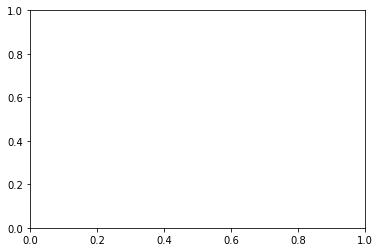

In [5]:
fig,ax = plt.subplots()
